In [1]:
import toml
import torch
import matplotlib.pyplot as plt
from fastai.callback.schedule import combined_cos

In [2]:
from IPython.display import IFrame
from IPython.core.display import HTML 

# Model Training

This jupyter notebook gives an overview how to train a deep learning model using the radionets framework. For the deep learning model training the executable `radionets_training <...>` is used, which is added to your path when installing the radionets package. 

## Training Config

Again, all necessary options and paths have to be set in a configuration file. In this example we will use the `default_train_config.toml`.

In [3]:
config_path = "./default_train_config.toml"
train_conf = toml.load(config_path)
train_conf.keys()

dict_keys(['title', 'mode', 'paths', 'general', 'hypers', 'param_scheduling'])

The config file is divided into following parts:
* mode
* paths
* general
* hypers
* param_scheduling

### mode

In this section, three options are available. One is he possibility to enable `batch_mode`. This is necessary when you are running the analysis on a machine with queuing systems like `slurm`. It will disable all user input prompts. With the `gpu` keyword you can enable to use a gpu device for the training. The last option is to enable the `telegram_logger`, which will send training information to a telegram bot. Before this feature can be used, the telegram logger has to be configured. Detailed instructions can be found in [has to be specified!].

In [4]:
train_conf["mode"]

{'batch_mode': True, 'gpu': True, 'telegram_logger': False}

### paths

This part of the config file is used to set the different data and model paths. You can specify the `data_path` to the simulations which shall be used for the training. The `model_path` defines where the model weights are saved after the training process is completed. Furthermore, there are the options to load a `pre_model` before the training and to pass a `norm_path` with values to normalize all batches before they are passed to the network.

In [5]:
train_conf["paths"]

{'data_path': './example_data/',
 'model_path': './build/example_model/example.model',
 'pre_model': 'none',
 'norm_path': 'none'}

### general

In this section, some general options have to be specified. First of all, you can define wheter the used dataset is a `fourier` datset or not. Furthermore, it must be set if the used dataset is a `source_list` one. For the architecture a `arch_name` from the list of defined architectures can be indicated. The some applies to the `loss_func`. The network will be trained for `num_epochs`. When enabling the inspection option a bunch of example predictions will be generated after the training process is finished. A list of all available architectures and loss functions can be found in [Archs&Losses](Archs&Losses.ipynb)

In [6]:
train_conf["general"]

{'fourier': True,
 'source_list': False,
 'arch_name': 'filter_deep',
 'loss_func': 'splitted_mse',
 'num_epochs': 10,
 'inspection': True}

### hypers

Here, the hyper parameters are defined. These are the learning rate `lr` and the `batch_size`.

In [7]:
train_conf["hypers"]

{'batch_size': 100, 'lr': 0.001}

### param_scheduling

Instead of a static learning rate, an adaptive one can be used by enabling this option. A combined cosine shape shown in the image below will be used to adjust the learning rate over the training process. `lr_start`, `lr_max` and `lr_stop` can be specified in this section of the config file.

In [8]:
train_conf["param_scheduling"]

{'use': True, 'lr_start': 0.001, 'lr_max': 0.005, 'lr_stop': 0.0007}

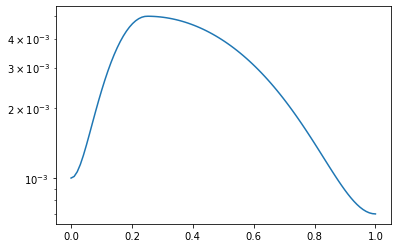

In [9]:
f = combined_cos(0.25,1e-3,5e-3,7e-4)
p = torch.linspace(0.,1,100)
plt.plot(p, [f(o) for o in p]);
plt.yscale("log")

## Training of a Neural Network

Starting the training process with the default config file.

In [37]:
!radionets_training ./default_train_config.toml


 Train config:
{'data_path': './example_data/', 'model_path': './build/example_model/example.model', 'pre_model': 'none', 'norm_path': 'none', 'batch_mode': True, 'gpu': True, 'telegram_logger': False, 'bs': 100, 'lr': 0.001, 'fourier': True, 'arch_name': 'filter_deep', 'loss_func': 'splitted_mse', 'num_epochs': 10, 'inspection': True, 'param_scheduling': True, 'lr_start': 0.07, 'lr_max': 0.3, 'lr_stop': 0.05, 'source_list': False} 

Overwriting existing model file!
Start training of the model.

[0, 60.859710693359375, 31.016109466552734, '00:05']
[1, 34.309425354003906, 24.508316040039062, '00:04']
[2, 21.874887466430664, 14.801036834716797, '00:04']
[3, 15.244681358337402, 12.179502487182617, '00:04']
[4, 11.919840812683105, 10.447869300842285, '00:04']
[5, 10.0645112991333, 9.625311851501465, '00:04']
[6, 8.895692825317383, 8.033062934875488, '00:04']
[7, 8.0844087600708, 7.987521171569824, '00:04']
[8, 7.476557731628418, 7.356611251831055, '00:04']
[9, 7.045889854431152, 7.0369925

### Creating the Loss Plot

At the end of the training process the loss plot is created automatically. Nethertheless, it can also be created using `--mode=plot_loss` for the `radionets_training` executable.

In [28]:
!radionets_training --mode=plot_loss ./default_train_config.toml


 Train config:
{'data_path': './example_data/', 'model_path': './build/example_model/example.model', 'pre_model': 'none', 'norm_path': 'none', 'batch_mode': True, 'gpu': True, 'telegram_logger': False, 'bs': 100, 'lr': 0.001, 'fourier': True, 'arch_name': 'filter_deep', 'loss_func': 'splitted_mse', 'num_epochs': 10, 'inspection': True, 'param_scheduling': True, 'lr_start': 0.001, 'lr_max': 0.005, 'lr_stop': 0.0007, 'source_list': False} 

Start plotting loss.


Load pretrained model: example


Plotting Learning rate for: example


Plotting Loss for: example



In [36]:
IFrame(src="./build/example_model/example_loss.pdf", width=600, height=450)

### Example Predictions

When using the `inspection=True` example predictions are created after the training process is finished. These can be found in the model directory.

In [41]:
IFrame(src="./build/example_model/prediction_0.pdf", width=800, height=450)

### Find LR

Another feature is the find learning rate functionality, which uses the implementation from [fastai](https://github.com/fastai/fastai). The created plot can be used to get an idea of the best suited learning rate for the training process. It can be enabled by using the `radionets_training` executable with `--mode=lr_find`.

In [31]:
!radionets_training --mode=lr_find ./default_train_config.toml


 Train config:
{'data_path': './example_data/', 'model_path': './build/example_model/example.model', 'pre_model': 'none', 'norm_path': 'none', 'batch_mode': True, 'gpu': True, 'telegram_logger': False, 'bs': 100, 'lr': 0.001, 'fourier': True, 'arch_name': 'filter_deep', 'loss_func': 'splitted_mse', 'num_epochs': 10, 'inspection': True, 'param_scheduling': True, 'lr_start': 0.001, 'lr_max': 0.005, 'lr_stop': 0.0007, 'source_list': False} 

Start lr_find.


Plotting Lr vs Loss for architecture: filter_deep



In [32]:
IFrame(src="./build/example_model/lr_loss.pdf", width=800, height=450)

It is recommended to choose the learning rate where the loss curve has the steepest gradient.